In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pmdarima import auto_arima

In [22]:
df = pd.read_csv("../data/valor.csv")

In [23]:
df.head()

,data,queijo,leite,doce_leite,ovos,suinos,hortalicas
0,ago-2021,0,123,0,0,600,0
1,set-2021,741,408,190,0,240,0
2,out-2021,876,387,400,0,750,0
3,nov-2021,857,663,42,0,1040,0
4,dez-2021,525,252,69,0,1350,0


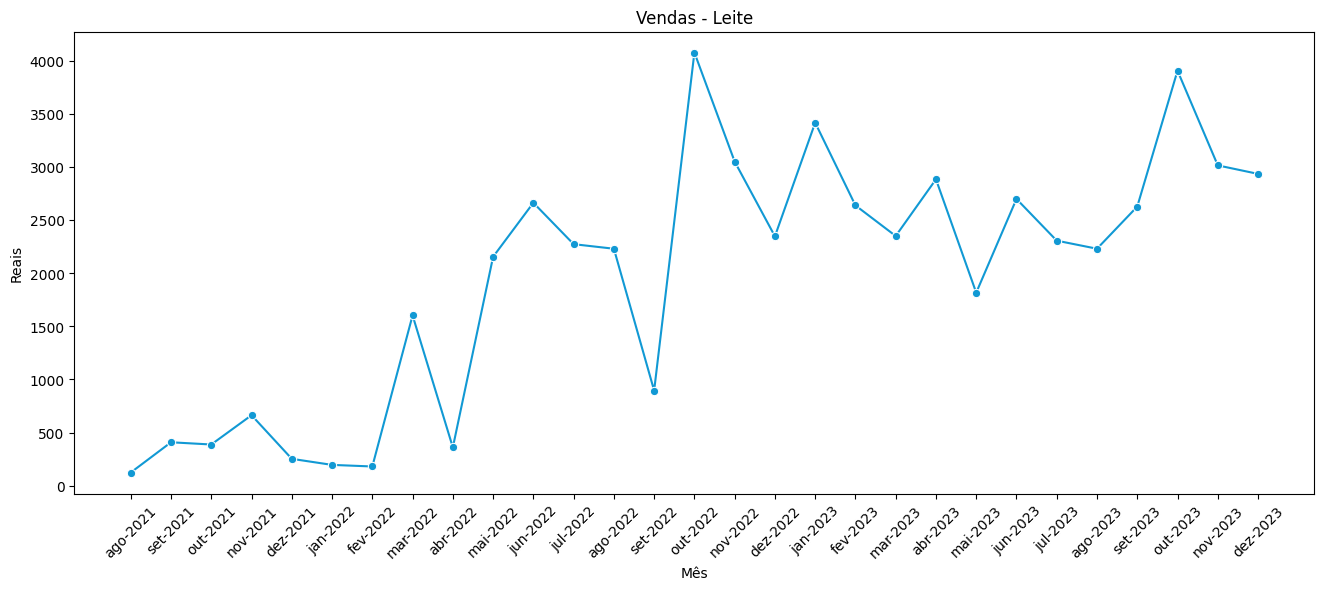

In [24]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='leite', marker='o', color= '#1199d4')
plt.xticks(rotation=45)
plt.title('Vendas - Leite')
plt.xlabel('Mês')
plt.ylabel('Reais')
plt.show()

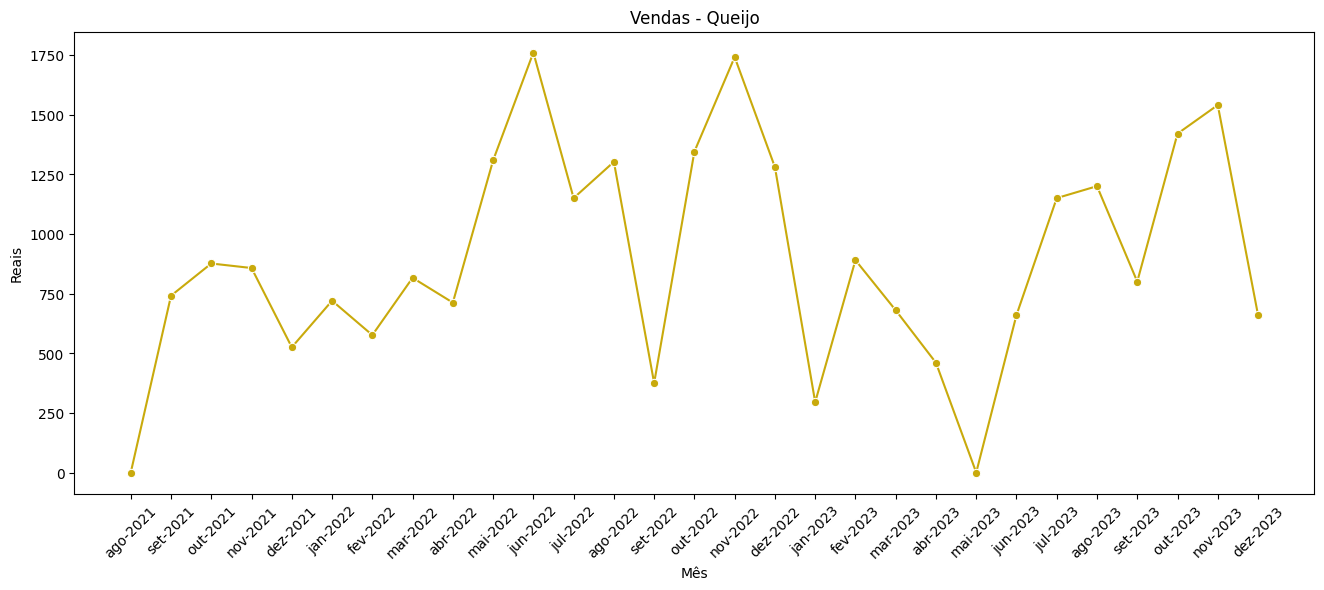

In [25]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='queijo', marker='o', color= '#c9aa0c')
plt.xticks(rotation=45)
plt.title('Vendas - Queijo')
plt.xlabel('Mês')
plt.ylabel('Reais')
plt.show()

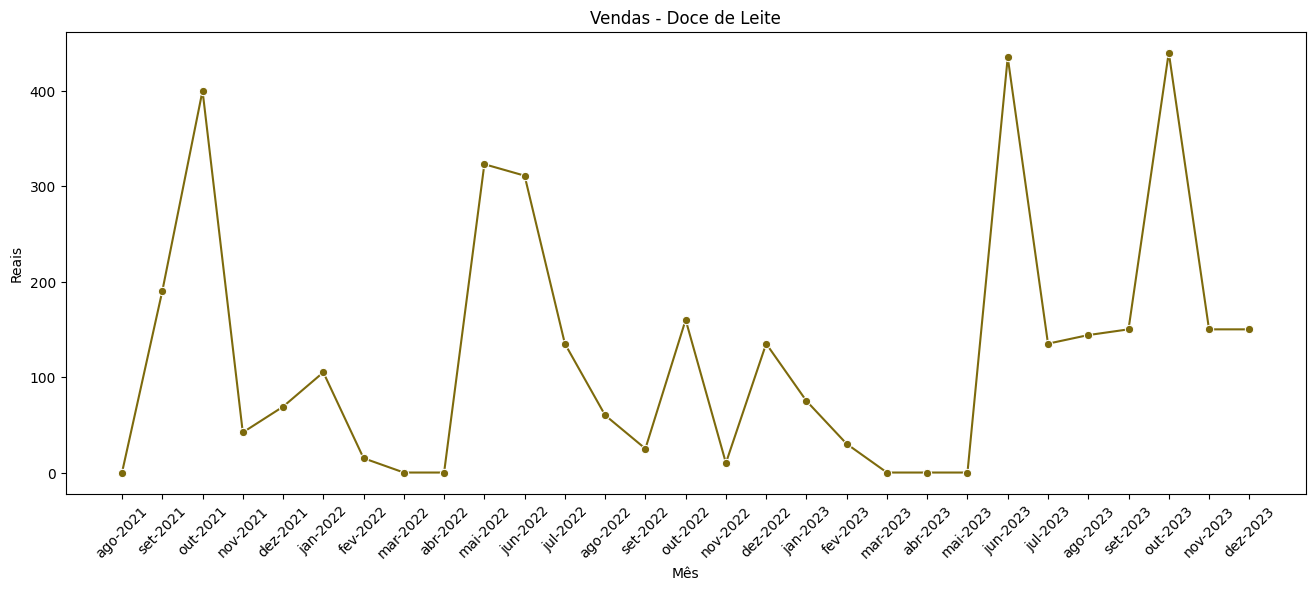

In [26]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='data', y='doce_leite', marker='o', color='#7d6a0c')
plt.title('Vendas - Doce de Leite')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Reais')
plt.show()

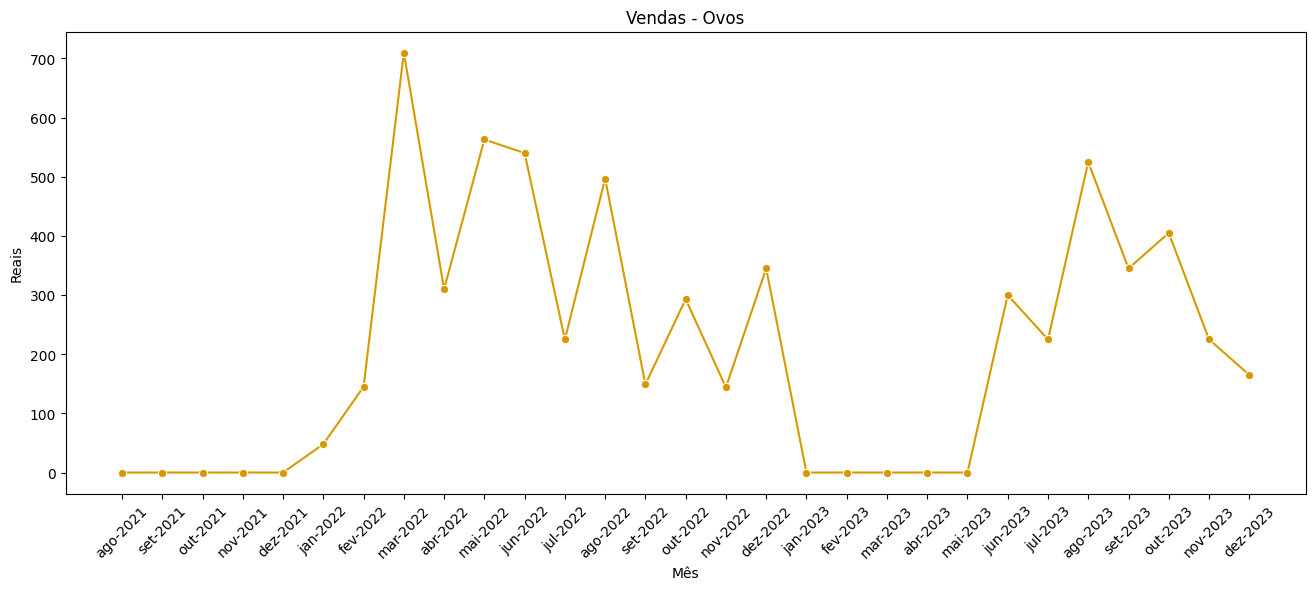

In [27]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='ovos', marker='o', color='#d69a00')
plt.title('Vendas - Ovos')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Reais')
plt.show()

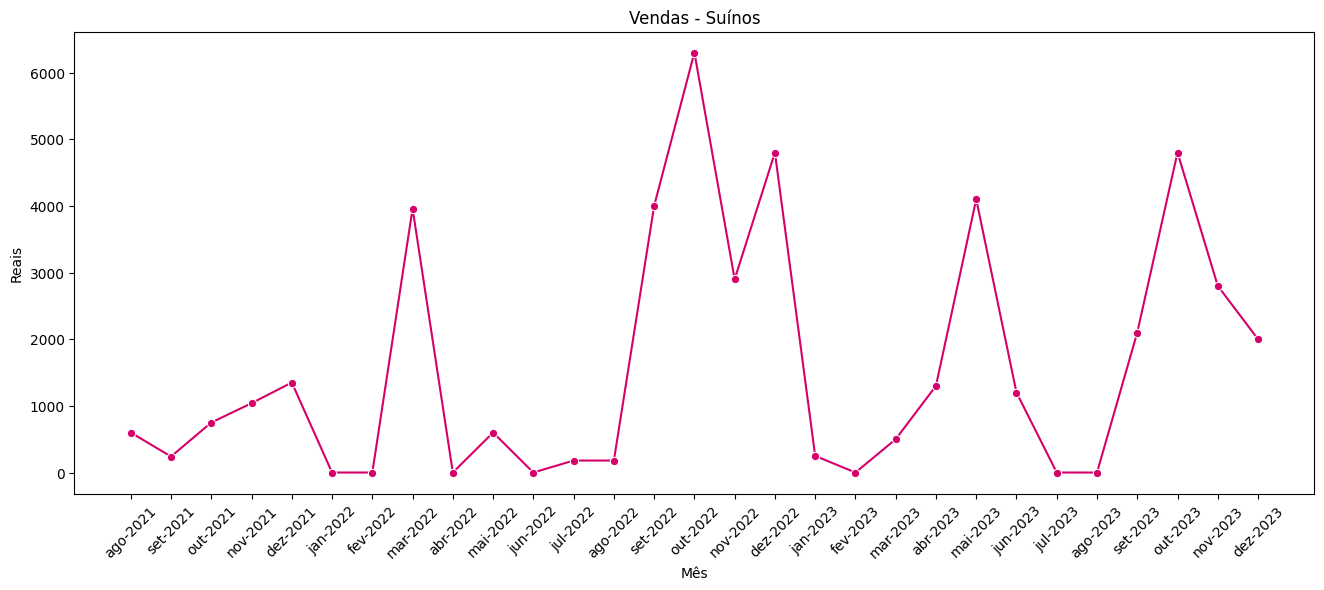

In [28]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='suinos', marker='o', color='#d6006b')
plt.title('Vendas - Suínos')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Reais')
plt.show()

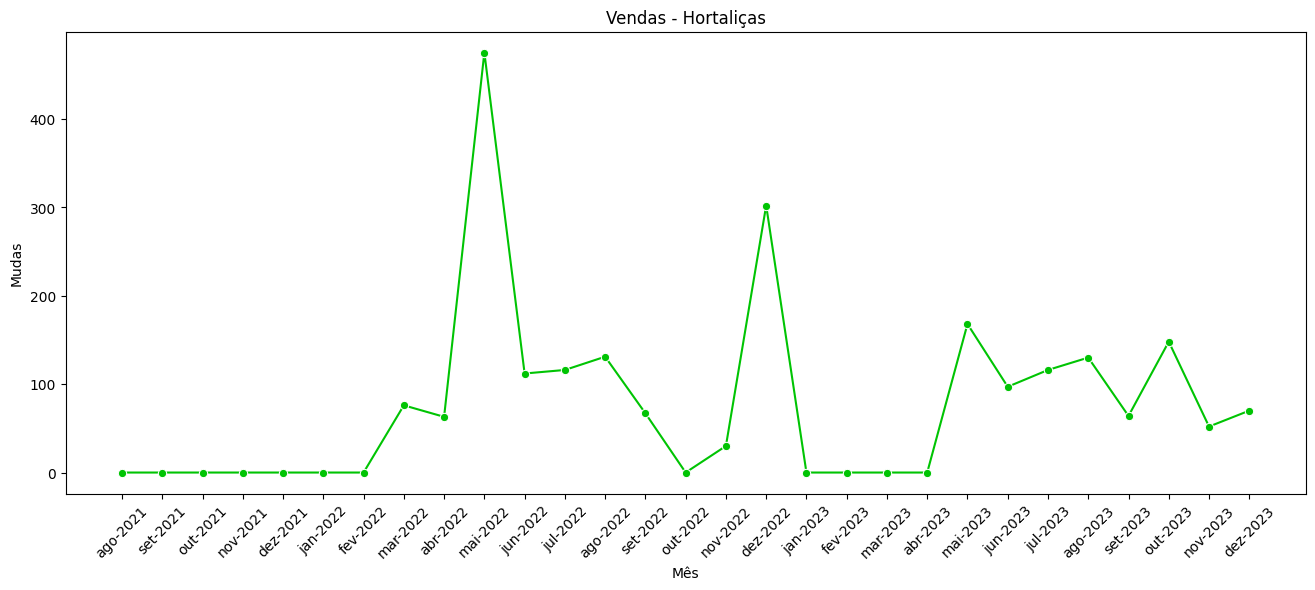

In [29]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='data', y='hortalicas', marker='o', color='#00c403')
plt.title('Vendas - Hortaliças')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.ylabel('Mudas')
plt.show()

In [30]:
colunas = ['leite', 'queijo', 'doce_leite', 'ovos', 'suinos', 'hortalicas']
resumo_df = pd.DataFrame({
    'Média': df[colunas].mean(),
    'Mínimo': df[colunas].min(),
    'Máximo': df[colunas].max(),
    'Soma': df[colunas].sum()
})

resumo_df = resumo_df.round(2)
resumo_df

,Média,Mínimo,Máximo,Soma
leite,1955.34,123,4079,56705
queijo,891.00,0,1760,25839
doce_leite,127.21,0,440,3689
ovos,212.38,0,710,6159
suinos,1584.48,0,6300,45950
hortalicas,76.45,0,475,2217


Text(0, 0.5, 'Doce de Leite')

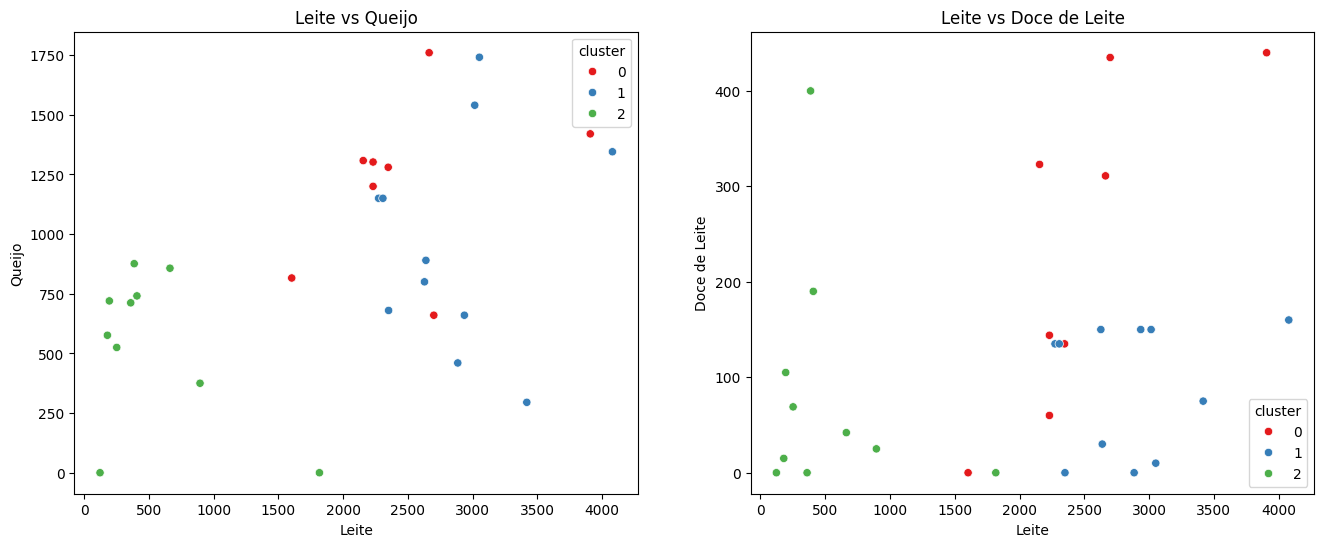

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[colunas])
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.scatterplot(data=df, x='leite', y='queijo', hue='cluster', palette='Set1', ax=axes[0])
axes[0].set_title('Leite vs Queijo')
axes[0].set_xlabel('Leite')
axes[0].set_ylabel('Queijo')

sns.scatterplot(data=df, x='leite', y='doce_leite', hue='cluster', palette='Set1', ax=axes[1])
axes[1].set_title('Leite vs Doce de Leite')
axes[1].set_xlabel('Leite')
axes[1].set_ylabel('Doce de Leite')


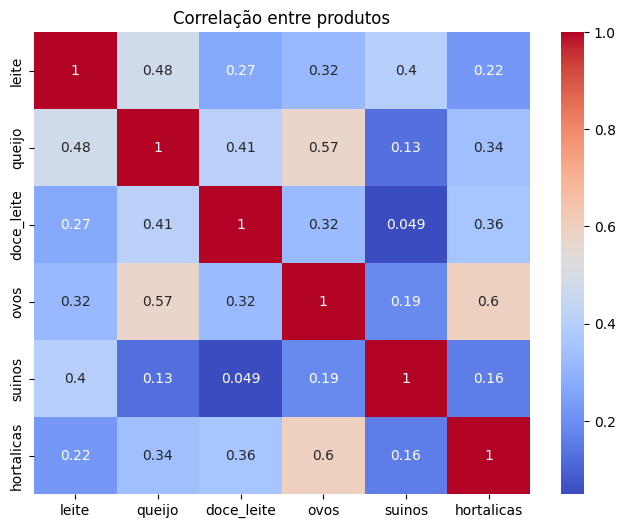

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df[colunas].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre produtos')
plt.show()

<Axes: xlabel='data', ylabel='quantidade'>

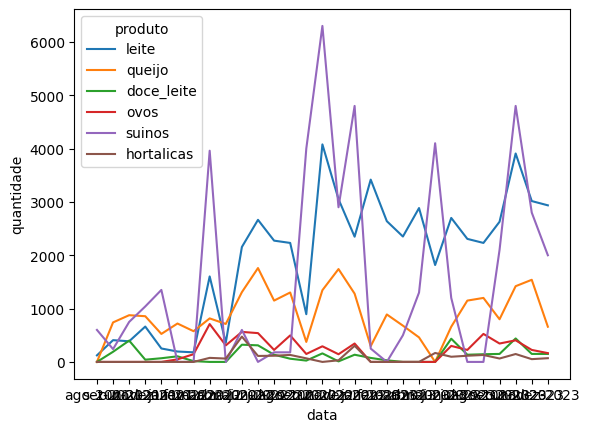

In [33]:
df_melted = df.melt(id_vars='data', value_vars=colunas, var_name='produto', value_name='quantidade')
sns.lineplot(data=df_melted, x='data', y='quantidade', hue='produto')


Previsão Vendas de Leite

In [34]:
X = df.drop(columns=['leite', 'data'])
y = df['leite']
divisor_index = int(len(df) * 0.8)

training_X = X.iloc[:divisor_index]
test_X = X.iloc[divisor_index:]

training_y = y.iloc[:divisor_index]
test_y = y.iloc[divisor_index:]



In [35]:
model = auto_arima(y = training_y,
                   x = training_X,
                   m = 12)


n_periodos = len(test_y)
previsao = model.predict(n_periods=12, X=test_X)

previsao

/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/d

23    2974.667055
24    3160.320105
25    3798.492474
26    2854.772096
27    3384.801797
28    3801.789162
29    3597.918622
30    4041.154208
31    4312.551444
32    4296.268185
33    4840.646913
34    4702.221936
dtype: float64

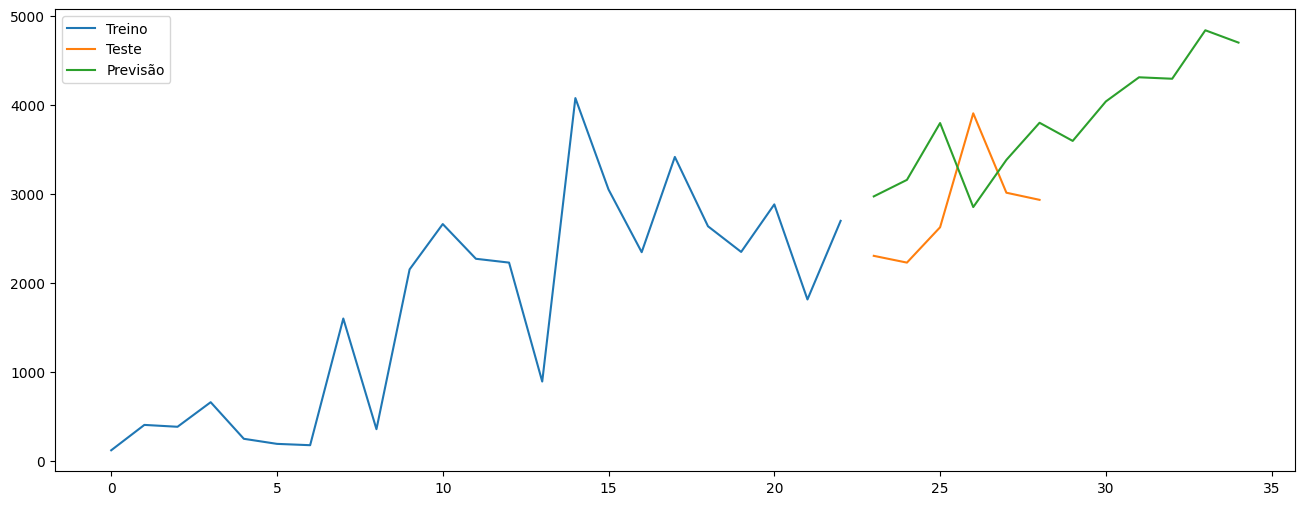

In [36]:
training_y.plot(figsize=(16,6), label='Treino')
test_y.plot(label = 'Teste')
previsao.plot(label='Previsão')
plt.legend()
plt.show()

In [37]:
X = df.drop(columns=['queijo', 'data'])
y = df['queijo']
divisor_index = int(len(df) * 0.8)

training_X = X.iloc[:divisor_index]
test_X = X.iloc[divisor_index:]

training_y = y.iloc[:divisor_index]
test_y = y.iloc[divisor_index:]

In [38]:
model = auto_arima(y = training_y,
                   X = training_X,
                   m = 12)


n_periodos = len(test_y)
previsao = model.predict(n_periods=n_periodos, X=test_X)

previsao

/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/guilherme/Documentos/Cooperativa/venv/lib/python3.13/site-packages/sklearn/utils/d

23    1031.584816
24    1274.107189
25    1211.698694
26    1495.524679
27    1094.802436
28    1019.166602
dtype: float64

In [ ]:
training_y.plot(figsize=(16,6), label='Treino')
test_y.plot(label = 'Teste')
previsao.plot(label='Previsão')
plt.legend()
plt.show()
